In [17]:
import requests
import random
import plotly.graph_objects as go
import plotly.express as px

## RNorm


In [2]:
content = requests.get('https://rxnav.nlm.nih.gov/REST/drugs.json?name=tylenol').json()
content

{'drugGroup': {'name': None,
  'conceptGroup': [{'tty': 'BPCK'},
   {'tty': 'SBD',
    'conceptProperties': [{'rxcui': '1243440',
      'name': '8 HR acetaminophen 650 MG Extended Release Oral Tablet [Tylenol]',
      'synonym': 'Tylenol 650 MG 8 HR Extended Release Oral Tablet',
      'tty': 'SBD',
      'language': 'ENG',
      'suppress': 'N',
      'umlscui': ''},
     {'rxcui': '1738139',
      'name': 'acetaminophen 325 MG Oral Capsule [Tylenol]',
      'synonym': 'Tylenol 325 MG Oral Capsule',
      'tty': 'SBD',
      'language': 'ENG',
      'suppress': 'N',
      'umlscui': ''},
     {'rxcui': '209387',
      'name': 'acetaminophen 325 MG Oral Tablet [Tylenol]',
      'synonym': 'Tylenol 325 MG Oral Tablet',
      'tty': 'SBD',
      'language': 'ENG',
      'suppress': 'N',
      'umlscui': ''},
     {'rxcui': '209459',
      'name': 'acetaminophen 500 MG Oral Tablet [Tylenol]',
      'synonym': 'Tylenol 500 MG Oral Tablet',
      'tty': 'SBD',
      'language': 'ENG',
     

In [3]:
for i in content['drugGroup']['conceptGroup']:
    try: 
        for j in i['conceptProperties']:
            print(j['rxcui'], j['name'])
    except KeyError:
        pass

1243440 8 HR acetaminophen 650 MG Extended Release Oral Tablet [Tylenol]
1738139 acetaminophen 325 MG Oral Capsule [Tylenol]
209387 acetaminophen 325 MG Oral Tablet [Tylenol]
209459 acetaminophen 500 MG Oral Tablet [Tylenol]
2178758 acetaminophen 160 MG Oral Powder [Tylenol]
2374361 acetaminophen 500 MG Oral Powder [Tylenol]
828555 acetaminophen 32 MG/ML Oral Suspension [Tylenol]
828557 acetaminophen 160 MG Chewable Tablet [Tylenol]


In [4]:
def getRxNorm(query_str):
    query_str = [i.strip() for i in query_str.split(',')]
    cui_name = {}
    for q in query_str:
        content = requests.get(f'https://rxnav.nlm.nih.gov/REST/drugs.json?name={q}').json()
        for i in content['drugGroup']['conceptGroup']:
            try: 
                for j in i['conceptProperties']:
                    # cui_name.append([j['rxcui'], j['name']])
                    cui_name[j['rxcui']] = j['name']
            except KeyError:
                pass
    return cui_name
    
rxnorm = getRxNorm('sildenafil, tylenol')

## FDA API

In [5]:
# count patient sex
# https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:%22207106%22&count=patient.patientsex

# count patient onstage age
# https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:%22207106%22&count=patient.patientonsetage

In [6]:
def getFda(query_cui):
    content = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:\'581645\'').json()

In [3]:
content = requests.get('https://api.fda.gov/drug/event.json?search=patient.drug.openfda.rxcui:%22207106%22&count=patient.patientsex').json()

In [22]:
# for i in content['results']:
#     print(i['term'], i['count'])
sex_dict = {0: "Sex unknown", 1: "Male", 2: 'Female'}

plot_dict = {sex_dict[i['term']]: i['count'] for i in content['results']}

In [ ]:
px.bar(x=plot_dict.keys(), y = plot_dict.values(), color=plot_dict.keys())

## RXInteraction

In [9]:
content = requests.get('https://rxnav.nlm.nih.gov/REST/interaction/list.json?rxcuis=207106+152923+656659+828557+828555+209387+1738139').json()

In [10]:
content

{'nlmDisclaimer': 'It is not the intention of NLM to provide specific medical advice, but rather to provide users with information to better understand their health and their medications. NLM urges you to consult with a qualified physician for advice about medications.',
 'fullInteractionTypeGroup': [{'sourceDisclaimer': 'DrugBank is intended for educational and scientific research purposes only and you expressly acknowledge and agree that use of DrugBank is at your sole risk. The accuracy of DrugBank information is not guaranteed and reliance on DrugBank shall be at your sole risk. DrugBank is not intended as a substitute for professional medical advice, diagnosis or treatment..[www.drugbank.ca]',
   'sourceName': 'DrugBank',
   'fullInteractionType': [{'comment': 'Drug1 (rxcui = 1738139, name = acetaminophen 325 MG Oral Capsule [Tylenol], tty = SBD). Drug2 (rxcui = 207106, name = fluconazole 50 MG Oral Tablet [Diflucan], tty = SBD). Drug1 is resolved to acetaminophen, Drug2 is resolv

In [11]:
for i in content['fullInteractionTypeGroup']:
    for j in i['fullInteractionType']:
        print(i['sourceName'],
              j['minConcept'][0]['rxcui'],
              j['minConcept'][0]['name'],
              j['minConcept'][1]['rxcui'],
              j['minConcept'][1]['name'],
              j['interactionPair'][0]['severity'],  
              j['interactionPair'][0]['description'])

DrugBank 1738139 acetaminophen 325 MG Oral Capsule [Tylenol] 207106 fluconazole 50 MG Oral Tablet [Diflucan] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 152923 simvastatin 40 MG Oral Tablet [Zocor] 828555 acetaminophen 32 MG/ML Oral Suspension [Tylenol] N/A The metabolism of Simvastatin can be decreased when combined with Acetaminophen.
DrugBank 152923 simvastatin 40 MG Oral Tablet [Zocor] 656659 bosentan 125 MG Oral Tablet N/A The serum concentration of Simvastatin can be decreased when it is combined with Bosentan.
DrugBank 207106 fluconazole 50 MG Oral Tablet [Diflucan] 828557 acetaminophen 160 MG Chewable Tablet [Tylenol] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 207106 fluconazole 50 MG Oral Tablet [Diflucan] 209387 acetaminophen 325 MG Oral Tablet [Tylenol] N/A The metabolism of Acetaminophen can be decreased when combined with Fluconazole.
DrugBank 152923 simvastatin 40 MG Oral 

## Graph

In [12]:
class Edge:
    def __init__(self, src, dest, source, severity, additional_info):
        self.src = src # source
        self.dest = dest # destination 
        self.source = source  # source of info
        self.severity = severity  # severity of interaction
        self.additional_info = additional_info  # description of interaction

    def __str__(self):
        return f"{self.src.id} and {self.dest.id} has interaction \"{self.additional_info}\"\n"

class Vertex:
    def __init__(self, value, name):
        self.id = value # RxNorm CUI
        # TODO: Name
        self.name = name
        # TODO: User choices - implemented patient sex agg. only
        # self.reaction_sex = reaction_sex

        self.connectedTo = {}  # Key: Vertex, Value: Edge

    def __str__(self):
        return f"{''.join([str(edge) for edge in self.connectedTo.values()])}"

    def add_neighbor(self, nbr, edge):
        self.connectedTo[nbr] = edge

class Graph:
    def __init__(self):
        self.vert_list = {}  # vertices
        self.num_vertices = 0

    def add_vertex(self, key, name):
        self.num_vertices += 1
        new_vertex = Vertex(key, name)
        self.vert_list[key] = new_vertex
        return new_vertex

    def add_edge(self, f, f_name, t, t_name, source, severity, additional_info):
        # vertex
        if f not in self.vert_list:
            self.add_vertex(f, f_name)
        if t not in self.vert_list:
            self.add_vertex(t, t_name)

        # edge
        edge = Edge(self.vert_list[f], self.vert_list[t], source, severity, additional_info)
        self.vert_list[f].add_neighbor(self.vert_list[t], edge)
        # construct undirected graph
        reverse_edge = Edge(self.vert_list[t], self.vert_list[f], source, severity, additional_info)
        self.vert_list[t].add_neighbor(self.vert_list[f], reverse_edge)

# Example usage
graph = Graph()


for i in content['fullInteractionTypeGroup']:
    for j in i['fullInteractionType']:
        graph.add_edge(
            j['minConcept'][0]['rxcui'],
            j['minConcept'][0]['name'],
            j['minConcept'][1]['rxcui'],
            j['minConcept'][1]['name'],
            i['sourceName'],
            j['interactionPair'][0]['severity'],
            j['interactionPair'][0]['description']
        )

print(graph.vert_list["207106"])

207106 and 1738139 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 828557 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 209387 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."
207106 and 152923 has interaction "HMG Co-A reductase inhibitors - CYP3A4 inhibitors"
207106 and 656659 has interaction "The metabolism of Bosentan can be decreased when combined with Fluconazole."
207106 and 828555 has interaction "The metabolism of Acetaminophen can be decreased when combined with Fluconazole."



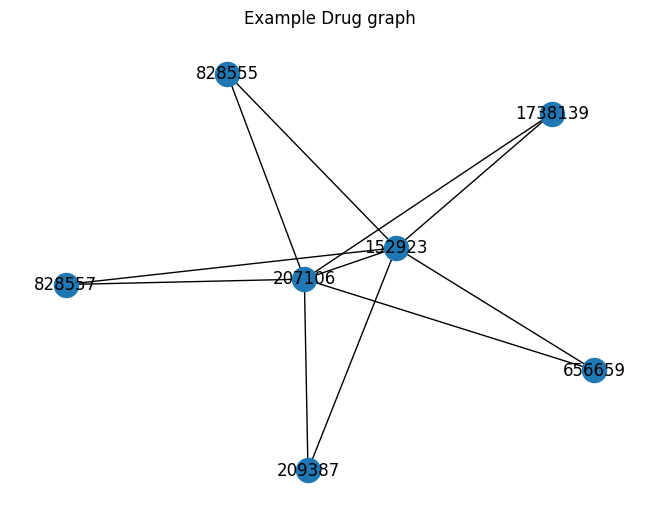

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly

def create_networkx_graph(g):
    G = nx.Graph()
    for vertex in g.vert_list.values():
        for edge in vertex.connectedTo.values():
            G.add_edge(edge.src.id, edge.dest.id)

    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Example Drug graph")
    plt.show()

create_networkx_graph(graph)

In [ ]:
import plotly.graph_objects as go
import networkx as nx
from collections import deque

# Function to create a NetworkX graph from your graph structure
def create_networkx_graph(drug_graph):
    G = nx.Graph()
    for vertex in drug_graph.vert_list.values():
        G.add_node(vertex.id)
        for neighbor in vertex.connectedTo:
            G.add_edge(vertex.id, neighbor.id,
                       severity=vertex.connectedTo[neighbor].severity,
                       additional_info=vertex.connectedTo[neighbor].additional_info,) 
    return G

def queue(a, b, qty):
    """either x0 and x1 or y0 and y1, qty of points to create"""
    q = deque()
    q.append((0, qty - 1)) # indexing starts at 0
    pts = [0] * qty
    pts[0] = a; pts[-1] = b # x0 is the first value, x1 is the last
    while len(q) != 0:
        left, right = q.popleft()       # remove working segment from queue
        center = (left + right + 1)//2  # creates index values for pts
        pts[center] = (pts[left] + pts[right])/2
        if right - left > 2:            # stop when qty met
            q.append((left, center))
            q.append((center, right))
    return pts

def collector(x0, x1, y0, y1, qty, ht):
    """line segment end points, how many midpoints, hovertext"""
    pth = [ht] * qty
    ptx = queue(x0, x1, qty + 2) # add 2 because the origin will be in the list
    pty = queue(y0, y1, qty + 2)
    ptx.pop(0); ptx.pop()        # pop first and last (the nodes)
    pty.pop(0); pty.pop()        # pop first and last (the nodes)
    return ptx, pty, pth

# Convert your graph to a NetworkX graph
G = create_networkx_graph(graph)

# Generate positions for each node using NetworkX
pos = nx.spring_layout(G)

# Extracting edge coordinates from the positions
edge_x = []
edge_y = []
m2x, m2y, m2t = [], [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])  # Add None to create a break between lines
    edge_y.extend([y0, y1, None])

    info = f"RxCUI: {edge[0]}, {edge[1]}<br>" + \
           f"Severity: {G.get_edge_data(edge[0], edge[1])['severity']}<br>" + \
           f"Rationale: {G.get_edge_data(edge[0], edge[1])['additional_info']}"

    ptsx, ptsy, ptsh = collector(x0, x1, y0, y1, 15, info)
    m2x.extend(ptsx)
    m2y.extend(ptsy)
    m2t.extend(ptsh)

# Create a trace for edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines')

mnode_trace = go.Scatter(x = m2x, y = m2y, mode = "markers", showlegend = False,
                          hovertemplate = "%{hovertext}<extra></extra>",
                          hovertext = m2t, marker = go.scatter.Marker(opacity = 0))

# Extracting node coordinates and labels
node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Create a trace for nodes
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=False,
        color='blue',
        size=10,
        line_width=2))

n_adjacencies = []
n_text = []

for node, adjacencies in enumerate(G.adjacency()):
    n_adjacencies.append(len(adjacencies[1]))
    n_text.append(f'RxCUI: {adjacencies[0]}<br>'+
                  f'# of connections: {str(len(adjacencies[1]))}')

node_trace.marker.color = n_adjacencies
node_trace.text = n_text

annots = []
for node, (x, y) in pos.items():
    annots.append(dict(x=x, y=y-0.1,
                       xref='x', yref='y',
                       text=node,
                       showarrow=False)
                    )

# Create a Plotly figure
fig = go.Figure(data=[edge_trace, node_trace, mnode_trace],
             layout=go.Layout(
                title='<br>Drug interactions graph',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=annots,
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.add_trace(edge_trace)
fig.show()

In [16]:
from collections import deque

def bfs(graph, start, end):
    visited = set()
    queue = deque([(start, 0)])

    while queue:
        current_vertex_id, distance = queue.popleft()
        if current_vertex_id == end:
            return distance

        if current_vertex_id not in visited:
            visited.add(current_vertex_id)
            current_vertex = graph.vert_list[current_vertex_id]
            for neighbor in current_vertex.connectedTo:
                if neighbor.id not in visited:
                    queue.append((neighbor.id, distance + 1))

    return None

print(bfs(graph, "828555", "209387"))

2


In [ ]:
import json

def getRxNorm(query_str):
    query_str = [i.strip().lower() for i in query_str.split(',')]
    cui_name = {}
    with open("./my_app/cache.json", 'r') as json_file:
        cache = json.load(json_file)

    for q in query_str:
        if q in cache: 
            print(q)
            print(cache.keys())
            print(cache[q])
            cui_name = cache[q]
        else: 
            print("Fetching new data")
            content = requests.get(f'https://rxnav.nlm.nih.gov/REST/drugs.json?name={q}').json()
            for i in content['drugGroup']['conceptGroup']:
                try: 
                    for j in i['conceptProperties']:
                        # cui_name.append([j['rxcui'], j['name']])
                        cui_name[j['rxcui']] = j['name']
                        cache.update({q: cui_name})
                        with open("./my_app/cache.json", "w") as f:
                            json.dump(cache, f)
                except KeyError:
                    pass
    return cui_name

getRxNorm("Sildenafil")

In [ ]:
import json
import requests

def getRxNorm(query_str):
    query_str = [i.strip().lower() for i in query_str.split(',')]
    cui_name = {}  # dictionary to store cui to drug_name mapping
    with open("./my_app/cache.json", 'r') as json_file:
        cache = json.load(json_file)
    
    for q in query_str:
        if q in cache.keys(): 
            print("data found in cache")
            cui_name.update(cache[q])  # update cui_name with cached data
        else: 
            print("Fetching new data")
            response = requests.get(f'https://rxnav.nlm.nih.gov/REST/drugs.json?name={q}').json()
            new_data = {}  # temporary dictionary to store new API data
            try:
                for i in response['drugGroup']['conceptGroup']:
                    if 'conceptProperties' in i:
                        for j in i['conceptProperties']:
                            new_data[j['rxcui']] = j['name']
                cache[q] = new_data  # update cache with new data for q
                cui_name.update(new_data)  # update cui_name with new API data
            except KeyError:
                pass

    # Update the cache file only once after processing all queries
    with open("./my_app/cache.json", "w") as f:
        json.dump(cache, f)

    return cui_name

# Example usage
getRxNorm("Dextromethorphan, Sildenafil")